## Testing Python Tools for importing GPR Data

#### Here diffrent import tools are tested for sgy. After that they are analysed to find important information.
- Chapter 1: Testing obspy segyio for import
- Chapter 2: What is Important Information
- Chapter 3: Validating that Data is 3D
- Chapter 4: Ploting Radargramms
- Chapter 5: Implementing in Pipeline


## Chapter 1: Testing obspy segyio for import

##### Trying to load files with obspy
**Note: SGY files are manaully uploaded because they are to large to handle for GitHub** \
That the code works it best, upload the File into the Folder **Data/Testdata/Files** \

In [1]:
#Importing used Packages to load the File
import sys
from pathlib import Path

#Setting Working directory
sys.path.append(str(Path.cwd().parent))

#Import the config file so that only the Filename needs to be changed in the _read_segy function
from config import *

from obspy.io.segy.segy import _read_segy

# load segy
obspy_1 = _read_segy(TEST_FILE_DIR / "UG3DQUERUNTERZUG.SGY")
obspy_2 = _read_segy(TEST_FILE_DIR / "EG-3D QUER001.SGY")







#### Import Data with segyio

In [1]:
import segyio
#Importing used Packages to load the File
import sys
from pathlib import Path

#Setting Working directory
sys.path.append(str(Path.cwd().parent))

#Import the config file so that only the Filename needs to be changed in the _read_segy function
from config import *

filename_1 = TEST_FILE_DIR / "UG3DQUERUNTERZUG.SGY"
filename_2 = TEST_FILE_DIR / "EG-3D QUER001.SGY"
segyio_1 = segyio.open(filename_1,"r", ignore_geometry=True)
segyio_2 = segyio.open(filename_2,"r", ignore_geometry=True)


### Conclusion Chapter 1

For both import tools there were no issues with the data that is given. This means both are good for importing SGY files



## Chapter2: What are important information? 

A sgy File has the following Byte structure according to "Seg y Rev2 1-Oct2023 | PDF | Integer (Computer Science) | Computer File», Scribd. Zugegriffen: 26. Oktober 2025. [Online]. Verfügbar unter: https://www.scribd.com/document/804232671/seg-y-rev2-1-oct2023"
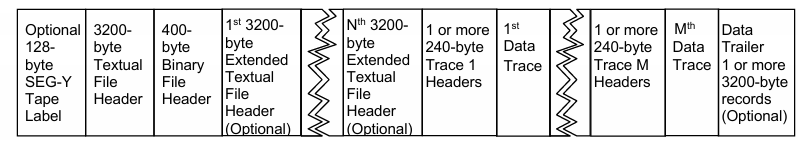


Out of the Structure of the SGY File Format it shows that there could be important information in the diffrent headers. Next step is to print the Headers with both types of import tools for SGY Files

##### Text Header

According to our source the structure should be as follows

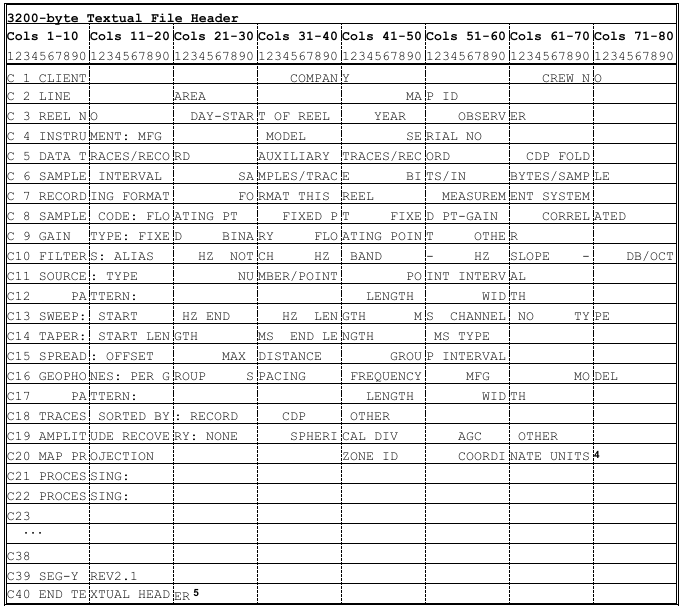

In [1]:
import codecs
## obspy Textual File Header for first file
textual_file_header = obspy_1.textual_file_header

#decode the header
decoded_header = codecs.decode(textual_file_header, "cp500")

for line in range(0, len(decoded_header), 80):
    print(decoded_header[line:line+80])

NameError: name 'obspy_1' is not defined

In [ ]:
import codecs
## obspy Textual File Header for second file
textual_file_header = obspy_2.textual_file_header

#decode the header
decoded_header = codecs.decode(textual_file_header, "cp500")

for line in range(0, len(decoded_header), 80):
    print(decoded_header[line:line+80])

C 1                                                                             
C 2                                                                             
C 3                                                                             
C 4                                                                             
C 5                                                                             
C 6                                                                             
C 7                                                                             
C 8                                                                             
C 9                                                                             
C10                                                                             
C11                                                                             
C12                                                                             
C13                         

In [9]:
## segyio Textual File Header for first file
textual_file_header_segyio = segyio.tools.wrap(segyio_1.text[0])
print(textual_file_header_segyio)




C 1
C 2
C 3
C 4
C 5
C 6
C 7
C 8
C 9
C10
C11
C12
C13
C14
C15
C16
C17
C18
C19
C20
C21
C22
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38
C39
C40 ED EBCDIC


In [10]:
## segyio Textual File Header for second file
textual_file_header_segyio = segyio.tools.wrap(segyio_2.text[0])
print(textual_file_header_segyio)

C 1
C 2
C 3
C 4
C 5
C 6
C 7
C 8
C 9
C10
C11
C12
C13
C14
C15
C16
C17
C18
C19
C20
C21
C22
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38
C39
C40 ED EBCDIC


As we now managed to print the Text File Header with both tools and for both files it shows that there is no information in those headers.

##### Binary Header

As displayed in the picture below it shows that there could be important information in the binary header. Because it contains binary values which are relevant to the whole SGY file.

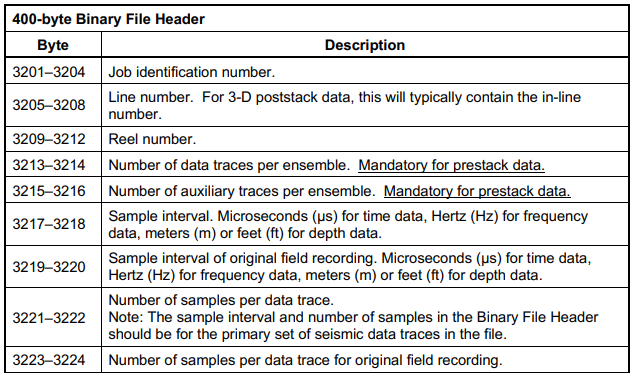
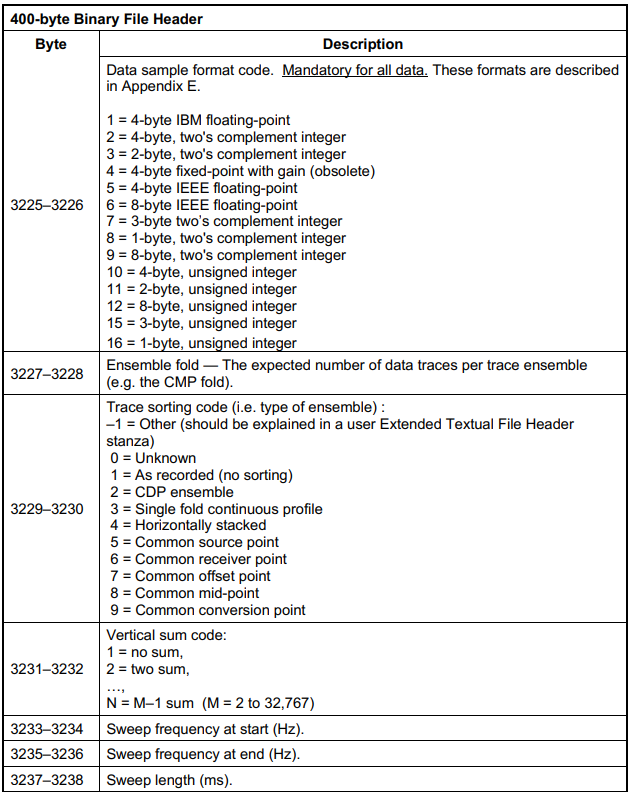
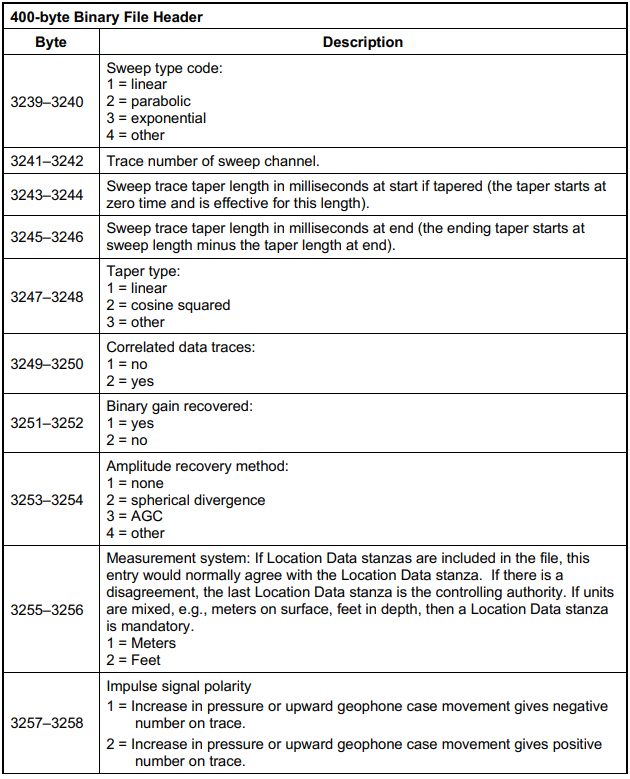
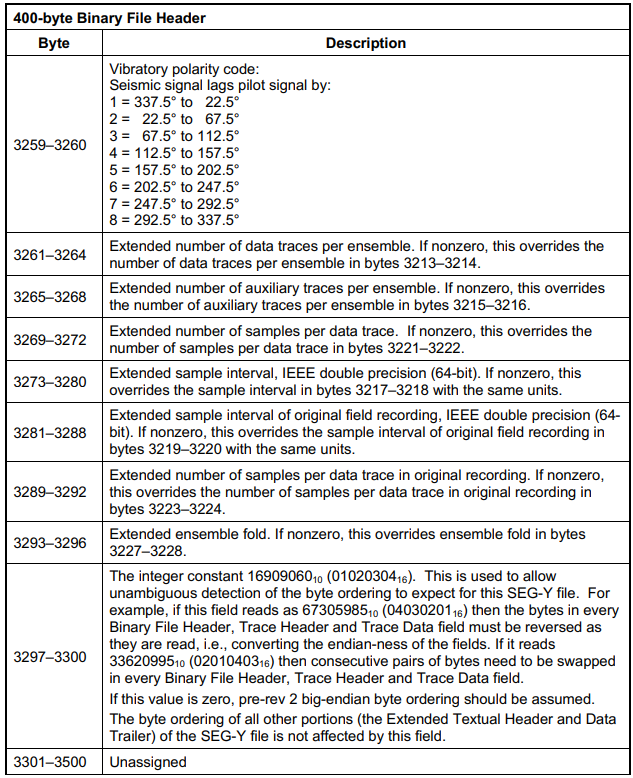
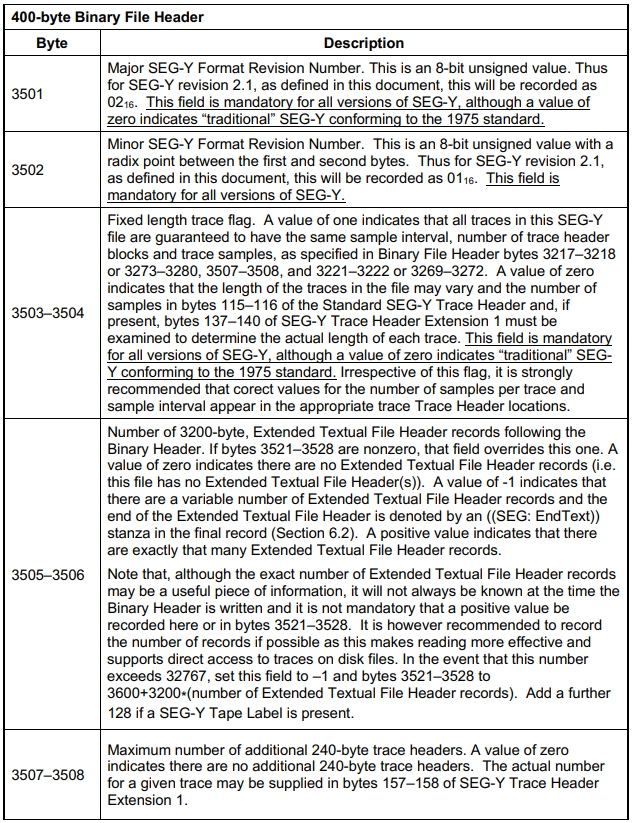
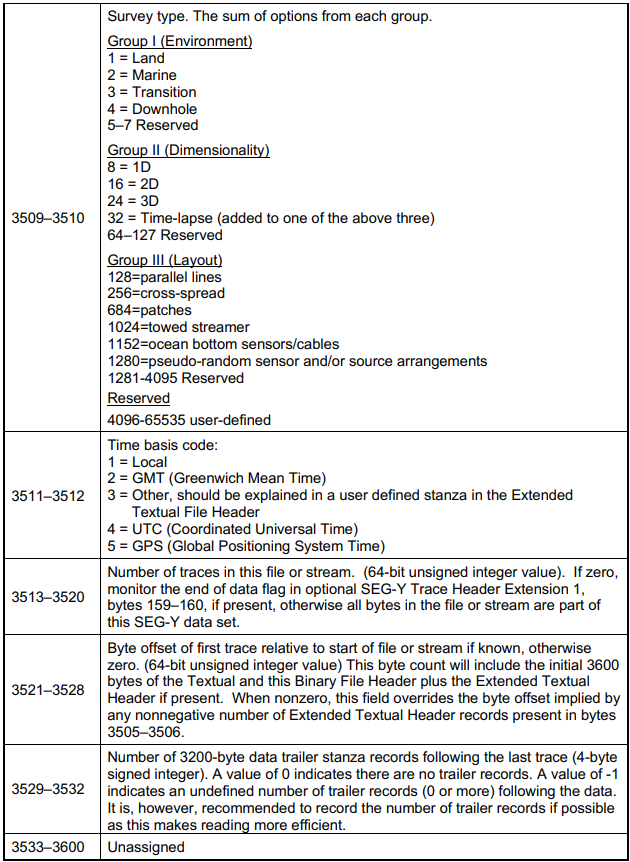



In [ ]:
#Binary Header for obspy for file 1
binary_header_obspy_1 = obspy_1.binary_file_header
print(binary_header_obspy_1)

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 49
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 400
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 3
	ensemble_fold: 1
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
#Binary Header for obspy for file 2
binary_header_obspy_2 = obspy_2.binary_file_header
print(binary_header_obspy_2)

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 49
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 400
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 3
	ensemble_fold: 1
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [2]:
#Binary Header for segyio for file 1
from pprint import pprint
bin_header_segyio_1 = dict(segyio_1.bin)
pprint(bin_header_segyio_1)


{SweepFrequencyEnd: 0,
 Interval: 49,
 Traces: 1,
 AuxTraces: 0,
 SweepChannel: 0,
 SweepTaperStart: 0,
 IntervalOriginal: 0,
 Samples: 400,
 MeasurementSystem: 1,
 ImpulseSignalPolarity: 0,
 CorrelatedTraces: 0,
 BinaryGainRecovery: 0,
 AmplitudeRecovery: 0,
 SamplesOriginal: 0,
 Format: 3,
 VibratoryPolarity: 0,
 JobID: 0,
 ExtAuxTraces: 0,
 ExtSamples: 0,
 ExtSamplesOriginal: 0,
 ExtEnsembleFold: 0,
 SEGYRevision: 0,
 SEGYRevisionMinor: 0,
 TraceFlag: 0,
 ExtendedHeaders: 0,
 LineNumber: 0,
 ReelNumber: 0,
 VerticalSum: 0,
 SweepFrequencyStart: 0,
 EnsembleFold: 1,
 SortingCode: 0,
 SweepTaperEnd: 0,
 Taper: 0,
 SweepLength: 0,
 Sweep: 0}


In [3]:
#Binary Header for segyio for file 1
from pprint import pprint
bin_header_segyio_2 = dict(segyio_2.bin)
pprint(bin_header_segyio_2)

{SweepFrequencyEnd: 0,
 Interval: 49,
 Traces: 1,
 AuxTraces: 0,
 SweepChannel: 0,
 SweepTaperStart: 0,
 IntervalOriginal: 0,
 Samples: 400,
 MeasurementSystem: 1,
 ImpulseSignalPolarity: 0,
 CorrelatedTraces: 0,
 BinaryGainRecovery: 0,
 AmplitudeRecovery: 0,
 SamplesOriginal: 0,
 Format: 3,
 VibratoryPolarity: 0,
 JobID: 0,
 ExtAuxTraces: 0,
 ExtSamples: 0,
 ExtSamplesOriginal: 0,
 ExtEnsembleFold: 0,
 SEGYRevision: 0,
 SEGYRevisionMinor: 0,
 TraceFlag: 0,
 ExtendedHeaders: 0,
 LineNumber: 0,
 ReelNumber: 0,
 VerticalSum: 0,
 SweepFrequencyStart: 0,
 EnsembleFold: 1,
 SortingCode: 0,
 SweepTaperEnd: 0,
 Taper: 0,
 SweepLength: 0,
 Sweep: 0}


There is immediality spotted a difference spotted between the 2 Packages segyio and obspy. It seems like the segyio Package has much shorter Key Names as the obspy version. And also these are more easy to read according to the picture above. But for both it seems they are not sorted according to Bytes. But that is not a big problem.

 furthermore the analysis shows that is not **SGY rev Version 1** because of the Field **SEGYRevision: 0**. Tht means it could be **SGY rev Version 0**. further analysis is based on the sources.  https://library.seg.org/pb-assets/technical-standards/seg_y_rev1-1686080991247.pdf 
https://library.seg.org/pb-assets/technical-standards/seg_y_rev0-1686080980707.pdf
https://segy.readthedocs.io/en/latest/data_models/file.html

**based on the intepretation of the headers with the segyio package is easier the further analysis of the data is focused with the segyio package.**

The Binary Header is structured as follows

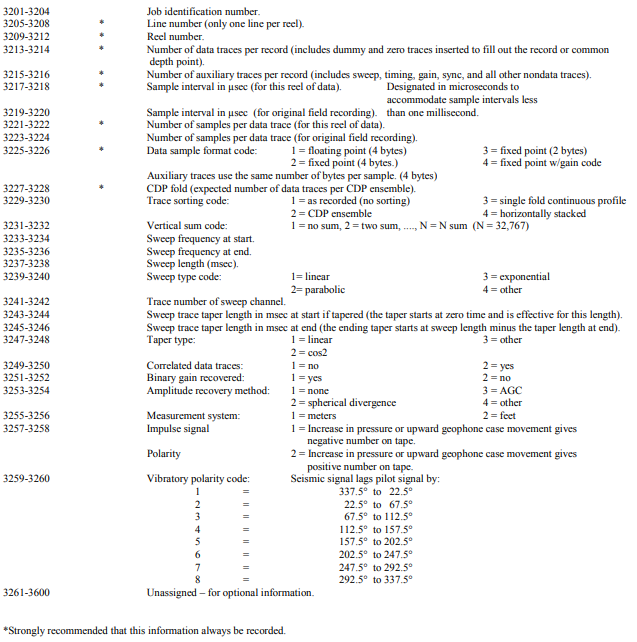

Since in the Textual Header most of the Fields are zero, the further analysis of the Data is based on the Binary Header and for that the fields which are non zero.

In [ ]:
# get the header fields with information file1
# create a Real dict out of 
bin_header_dict_segyio_1 = dict(bin_header_segyio_1)
for key, value in bin_header_dict_segyio_1.items():
    if value > 0 :
        print(f"{key}: {value}")


Traces: 1
Interval: 49
Samples: 400
Format: 3
EnsembleFold: 1
MeasurementSystem: 1


KeyError: 'Samples'

In [39]:
# get the header fields with information file2
# create a Real dict out of 
bin_header_dict_segyio_2 = dict(bin_header_segyio_2)
for key, value in bin_header_dict_segyio_1.items():
    if value > 0 :
        print(f"{key}: {value}")

Traces: 1
Interval: 49
Samples: 400
Format: 3
EnsembleFold: 1
MeasurementSystem: 1


Since file 1 and File 2 are excactly the same 
following meanings are found:

 |Field|Value|Meaning|
 |-----|-----|-------|
 |Traces|1|Number of Data Traces per Record|
 |Interval|49|Sample Interval in (microseconds)|
 |Format|3|Data Sample Format code: 3 is fixed point|
 |EnsembleFold|1|Number of expected data traces per CDP ensemble|
 |measurement System|1|meter|

##### Trace Header

According to the Source the fields should be like this.

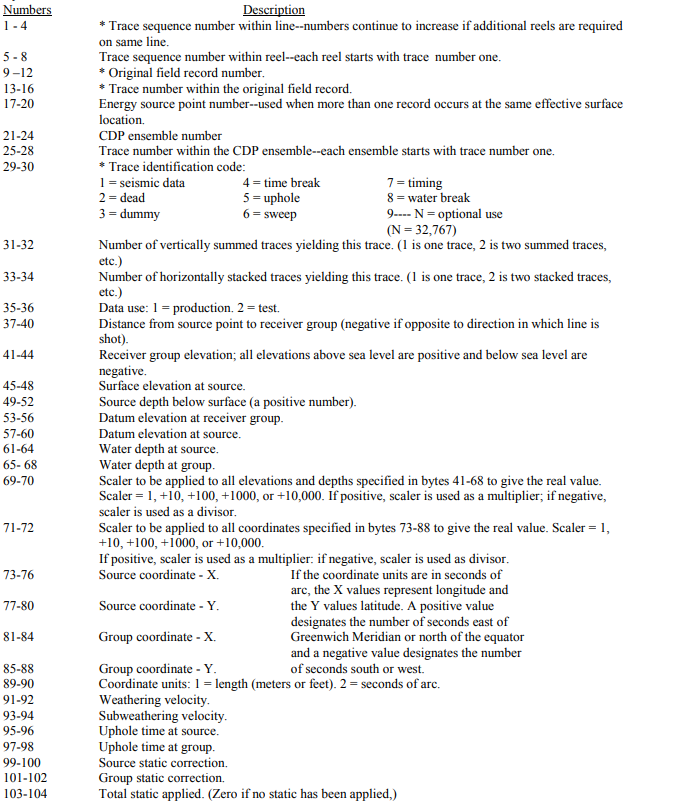
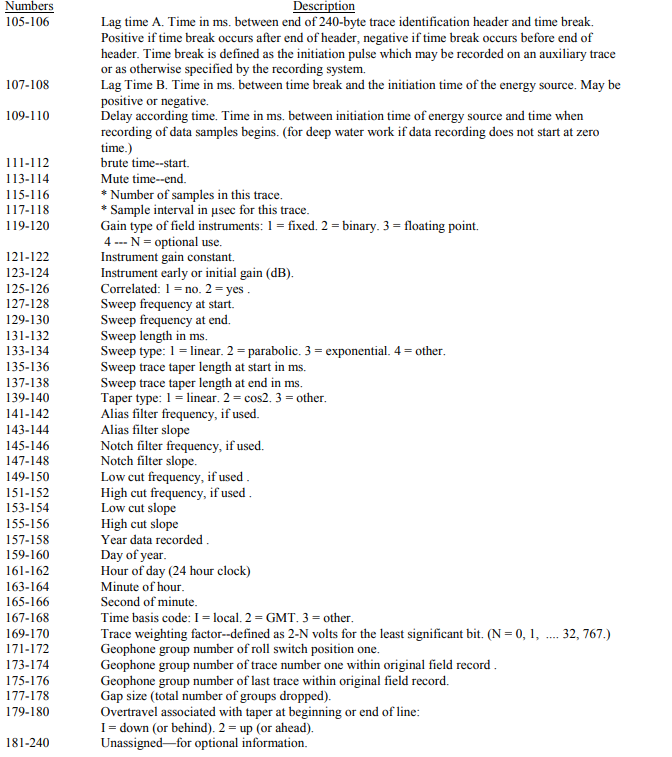

In [40]:
#trace Header from trace 1 and file 1
from pprint import pprint
trace_header_0_file_1 = dict(segyio_1.header[0])
pprint(trace_header_0_file_1)

{TraceNumber: 1,
 EnergySourcePoint: 1,
 NSummedTraces: 0,
 NStackedTraces: 0,
 GroupY: 0,
 CoordinateUnits: 0,
 CDP: 1,
 CDP_TRACE: 0,
 TraceIdentificationCode: 1,
 SourceY: 0,
 GroupX: 0,
 ReceiverGroupElevation: 0,
 SourceSurfaceElevation: 0,
 ReceiverDatumElevation: 0,
 SourceDatumElevation: 0,
 SourceDepth: 0,
 ElevationScalar: 1,
 SourceGroupScalar: 1,
 SourceX: 0,
 GroupUpholeTime: 0,
 SourceUpholeTime: 0,
 SourceStaticCorrection: 0,
 GroupStaticCorrection: 0,
 TotalStaticApplied: 0,
 LagTimeA: 0,
 LagTimeB: 0,
 DelayRecordingTime: 0,
 MuteTimeStart: 0,
 MuteTimeEND: 0,
 TRACE_SAMPLE_COUNT: 400,
 TRACE_SAMPLE_INTERVAL: 49,
 GainType: 0,
 InstrumentGainConstant: 0,
 InstrumentInitialGain: 0,
 Correlated: 0,
 SweepFrequencyStart: 0,
 SweepFrequencyEnd: 0,
 SweepLength: 0,
 SweepType: 0,
 SweepTraceTaperLengthStart: 0,
 SweepTraceTaperLengthEnd: 0,
 TaperType: 0,
 AliasFilterFrequency: 0,
 AliasFilterSlope: 0,
 NotchFilterFrequency: 0,
 NotchFilterSlope: 0,
 LowCutFrequency: 0,
 Hi

In [ ]:
#trace Header from trace 1 and file 2
from pprint import pprint

trace_header_0_file_2 = dict(segyio_2.header[0])
pprint(trace_header_0_file_2)

{TraceNumber: 1,
 EnergySourcePoint: 1,
 NSummedTraces: 0,
 NStackedTraces: 0,
 GroupY: 0,
 CoordinateUnits: 0,
 CDP: 1,
 CDP_TRACE: 0,
 TraceIdentificationCode: 1,
 SourceY: 0,
 GroupX: 0,
 ReceiverGroupElevation: 0,
 SourceSurfaceElevation: 0,
 ReceiverDatumElevation: 0,
 SourceDatumElevation: 0,
 SourceDepth: 0,
 ElevationScalar: 1,
 SourceGroupScalar: 1,
 SourceX: 0,
 GroupUpholeTime: 0,
 SourceUpholeTime: 0,
 SourceStaticCorrection: 0,
 GroupStaticCorrection: 0,
 TotalStaticApplied: 0,
 LagTimeA: 0,
 LagTimeB: 0,
 DelayRecordingTime: 0,
 MuteTimeStart: 0,
 MuteTimeEND: 0,
 TRACE_SAMPLE_COUNT: 400,
 TRACE_SAMPLE_INTERVAL: 49,
 GainType: 0,
 InstrumentGainConstant: 0,
 InstrumentInitialGain: 0,
 Correlated: 0,
 SweepFrequencyStart: 0,
 SweepFrequencyEnd: 0,
 SweepLength: 0,
 SweepType: 0,
 SweepTraceTaperLengthStart: 0,
 SweepTraceTaperLengthEnd: 0,
 TaperType: 0,
 AliasFilterFrequency: 0,
 AliasFilterSlope: 0,
 NotchFilterFrequency: 0,
 NotchFilterSlope: 0,
 LowCutFrequency: 0,
 Hi

Analysis of the trace header for both files shows that most fields are zero. Once again analysis is focused on the fields that are non zero.

In [ ]:
# get the header fields with information file1
# create a Real dict out of 

trace_0_header_dict_segyio_1 = dict(trace_header_0_file_1)
for key, value in trace_0_header_dict_segyio_1.items():
    if value > 0 :
        print(f"{key}: {value}")

TRACE_SEQUENCE_LINE: 1
TRACE_SEQUENCE_FILE: 1
FieldRecord: 1
TraceNumber: 1
EnergySourcePoint: 1
CDP: 1
TraceIdentificationCode: 1
ElevationScalar: 1
SourceGroupScalar: 1
TRACE_SAMPLE_COUNT: 400
TRACE_SAMPLE_INTERVAL: 49
INLINE_3D: 1
CROSSLINE_3D: 1


In [43]:
# get the header fields with information file1
# create a Real dict out of 
trace_0_header_dict_segyio_2 = dict(trace_header_0_file_2)
for key, value in trace_0_header_dict_segyio_2.items():
    if value > 0 :
        print(f"{key}: {value}")

TRACE_SEQUENCE_LINE: 1
TRACE_SEQUENCE_FILE: 1
FieldRecord: 1
TraceNumber: 1
EnergySourcePoint: 1
CDP: 1
TraceIdentificationCode: 1
ElevationScalar: 1
SourceGroupScalar: 1
TRACE_SAMPLE_COUNT: 400
TRACE_SAMPLE_INTERVAL: 49
CROSSLINE_3D: 1


Analysis shows that there are fields which are not present in the Source. Especially the fields **CROSSLINE_3D, INLINE_3D, CDP_X, CDP_Y**. according to this source we find that there were a variaty of how the data is stored in the headers https://help.dugeo.com/m/faq/l/187050-why-am-i-having-issues-loading-seg-y?. And according to https://library.seg.org/pb-assets/technical-standards/seg_y_rev1-1686080991247.pdf those fields are at fixed postions for rev 1.0 according to following Table. Next step is to check if the added fields are at the mentioned positions shown below. This is done to analyze if this is a rev0 file with added headers or it also could be a rev1 file which is not written down in the binary header.

|Byte|Field Name|
|-|-|
|181-184|CDP_X|
|185-188|CDP_Y|
|189-192|INLINE_3D|
|193-196|CROSSLINE_3D|

In [ ]:
#Checking Bytepositions for file 1

for name in dir(segyio.TraceField):
    byte_pos = getattr(segyio.TraceField, name)
    if name.isupper() and byte_pos >= 181:
        value = trace_header_0_file_1.get(byte_pos, None)
        print(f"{name:25s} -> Byte {byte_pos} | Value: {value}")

CDP_X                     -> Byte 181 | Wert: 0
CDP_Y                     -> Byte 185 | Wert: 0
CROSSLINE_3D              -> Byte 193 | Wert: 1
INLINE_3D                 -> Byte 189 | Wert: 1


In [ ]:
#Checking Bytepositions for file 2

for name in dir(segyio.TraceField):
    byte_pos = getattr(segyio.TraceField, name)
    if name.isupper() and byte_pos >= 181:
        value = trace_header_0_file_2.get(byte_pos, None)
        print(f"{name:25s} -> Byte {byte_pos} | Value: {value}")

CDP_X                     -> Byte 181 | Wert: 0
CDP_Y                     -> Byte 185 | Wert: 0
CROSSLINE_3D              -> Byte 193 | Wert: 1
INLINE_3D                 -> Byte 189 | Wert: 0


Once again the meaning of these headers is shown below.

| Field                    | Value | Meaning |
|---------------------------|--------|------------------|
| TRACE_SEQUENCE_LINE       | 1      | Position of the trace within the current line. |
| TRACE_SEQUENCE_FILE       | 1      | Position of the trace within the file. |
| FieldRecord               | 1      | Field record number where the trace was recorded. |
| TraceNumber               | 1      | Unique number identifying this trace within the record. |
| EnergySourcePoint         | 1      | Shot point or source location number. |
| CDP                       | 1      | Common Depth Point (gather identifier). |
| TraceIdentificationCode   | 1      | Type of trace (e.g., seismic data, dead trace, test, etc.). |
| ElevationScalar           | 1      | Scale factor applied to elevation values. |
| SourceGroupScalar         | 1      | Scale factor for source and receiver group coordinates. |
| TRACE_SAMPLE_COUNT        | 400    | Number of samples per trace. |
| TRACE_SAMPLE_INTERVAL     | 49     | Time interval between samples (microseconds). |
| CDP_X                     | 0      | X-coordinate of the CDP position. |
| CDP_Y                     | 0      | Y-coordinate of the CDP position. |
| INLINE_3D                 | 1      | Inline number (3D line index). |
| CROSSLINE_3D              | 1      | Crossline number (3D cross-index). |


And surley the most important information from the trace Headers are the fields **TraceNumber, INLINE_3D, CROSLINE_3D, TRACE_SAMPLE_COUNT, TRACE_SAMPLE_INTERVAL**. The Fields **TraceNumber, INLINE_3D, CROSLINE_3D** give the 3D Structure so that means  Radargramms can be recreated. This means to plot the Radargramm from a Inline perspective all Crosslines are sorted ascending. And hence for a Crossline Plot all Inlines have to be sorted ascending. For a Timeslice Plot (bird perspective) a Matrix needs to be created of Inlines X Crosslines for every Time Slice.

To easy axes the diffrent Amplitudes so the Data in the Traces a DataFrame is created with the Structure as follows.

|Trace|Inline|Crossline|Amplitudes|
|-----|---|-|-|

In [3]:
#creating Dataframe for file 1
#optional crwation of a csv
import numpy as np
import pandas as pd
rows= []

inlines   = segyio_1.attributes(segyio.TraceField.INLINE_3D)[:]
crosslines = segyio_1.attributes(segyio.TraceField.CROSSLINE_3D)[:]

for i in range(segyio_1.tracecount):
    amp = np.array(segyio_1.trace[i])
    inl = inlines[i]
    cross = crosslines[i]
    rows.append({
        "trace": i,
        "inline": inl,
        "crossline": cross,
        "Amplitude": amp
    })
df1 = pd.DataFrame(rows)
#df.to_csv("inline_crossline_segyio.csv", index =False)
print(df1.head())


   trace  inline  crossline                                          Amplitude
0      0       1          1  [-20228, -14833, -12170, -9433, -11480, -12543...
1      1       1          2  [-19524, -15504, -13631, -10211, -10939, -1103...
2      2       1          3  [-18915, -16373, -15126, -10702, -10026, -9497...
3      3       1          4  [-18675, -16565, -15221, -10267, -9359, -9442,...
4      4       1          5  [-17714, -17046, -16254, -10498, -8612, -8687,...


In [4]:
#creating Dataframe for file 2
#optional crwation of a csv
import numpy as np
import pandas as pd
rows= []

inlines   = segyio_2.attributes(segyio.TraceField.INLINE_3D)[:]
crosslines = segyio_2.attributes(segyio.TraceField.CROSSLINE_3D)[:]

for i in range(segyio_2.tracecount):
    amp = np.array(segyio_2.trace[i])
    inl = inlines[i]
    cross = crosslines[i]
    rows.append({
        "trace": i,
        "inline": inl,
        "crossline": cross,
        "Amplitude": amp
    })
df2 = pd.DataFrame(rows)
#df.to_csv("inline_crossline_segyio.csv", index =False)
print(df2.head())

   trace  inline  crossline                                          Amplitude
0      0       0          1  [-3779, -4808, -5511, -5421, -7800, -8821, -89...
1      1       0          2  [-3556, -4759, -5628, -5542, -7783, -8609, -86...
2      2       0          3  [-3445, -4734, -5746, -5699, -7867, -8492, -83...
3      3       0          4  [-3323, -4768, -5893, -5817, -7865, -8306, -80...
4      4       0          5  [-3376, -4907, -6050, -5876, -7803, -8150, -78...


the analysis shows that the data is structured as a grid. **note: it looks like there are just lines but we have a lot of crosslines per inline**

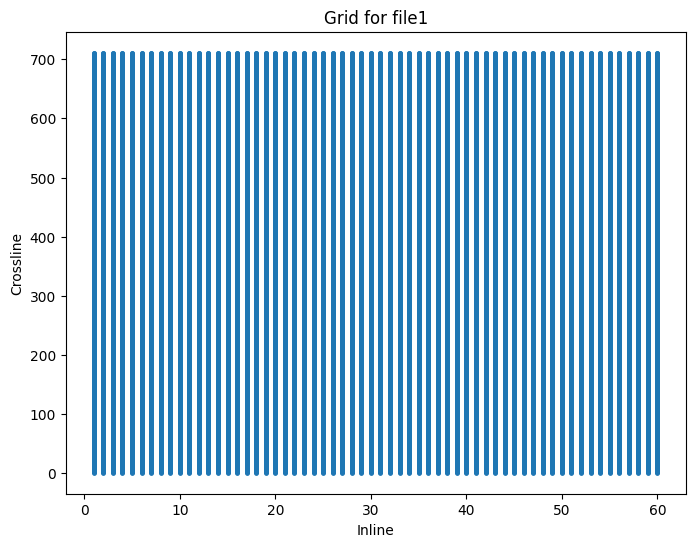

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(df1["inline"], df1["crossline"], s=6)
plt.xlabel("Inline")
plt.ylabel("Crossline")
plt.title(f"Grid for file1")
plt.show()

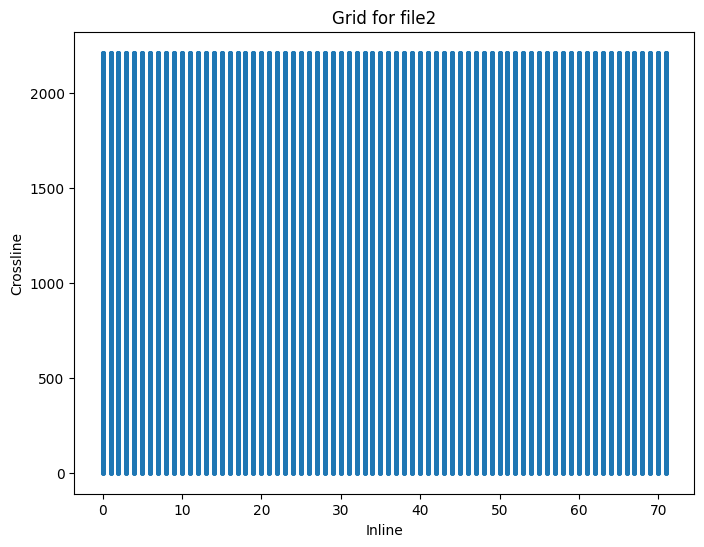

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(df2["inline"], df2["crossline"], s=6)
plt.xlabel("Inline")
plt.ylabel("Crossline")
plt.title(f"Grid for file2")
plt.show()

this shows that there is a higher density according to the crosslines so that means if plot the traces per Inline they should be more detailed Radargramms

## Chapter 3 Validating if a Dataset is 3D

what does a real 3D Dataset mean?
- According to findings and the source *https://www.sandmeier-geo.de/Download/3d_datainterpretation.pdf* in the above chapter it Means there is a Grid where the points include excatcly one trace. The Trace therefore can be located as for example (x,y) = (inlinenr, crosslinenr).
- the crosslines in the Dataframe for each Line are repeating themselves and are not incremental

for example:

**3D Data**

| trace | inline | crossline | amplitude |
|--------|--------|-----------|-----------|
| 1      | 1      | 1         | ...       |
| 2      | 1      | 2         | ...       |
| 3      | 2      | 1         | ...       |
| 4      | 2      | 2         | ...       |


**2D Data**

| trace | inline | amplitude |
|--------|----------|-----------|
| 1      | 1        | ...       |
| 2      | 1    | ...       |
| 3      | 2    | ...       |
| 4      | 2    | ...       |


The Code below shows a validation method


In [1]:
# Testing if Data is 3D or 2D
# testing for file 1

#extracting unique inlines and crosslines
import pandas as pd


# unique inline and Croslline combinations
combo_counts = df1.groupby(["inline", "crossline"]).size().reset_index(name="count")

# duplicated combinations
duplicates = combo_counts[combo_counts["count"] > 1]

# counting unique combinations
unique_pairs = len(combo_counts)

#counting number od traces
total_traces = len(df1)

# number of inlines and crosslines
n_inl = df1["inline"].nunique()
n_xl = df1["crossline"].nunique()

# Analyse
if len(duplicates) > 0:
    data_type = "2D"
elif n_inl == 1 or n_xl == 1:
    data_type = "2D"
elif unique_pairs == total_traces:
    data_type = "3D (unique combinations)"
else:
    data_type = "could not determine datatype"

print(f"Inlines: {n_inl}, Crosslines: {n_xl}")
print(f"Traces: {total_traces}, Unique Pairs: {unique_pairs}")
print(f"Number of duplicated combinations: {len(duplicates)}")
print(f"Datatype: {data_type}")





NameError: name 'df1' is not defined

In [ ]:
# Testing if Data is 3D or 2D
# testing for file 1

#extracting unique inlines and crosslines
import pandas as pd


# unique inline and Croslline combinations
combo_counts = df2.groupby(["inline", "crossline"]).size().reset_index(name="count")

# duplicated combinations
duplicates = combo_counts[combo_counts["count"] > 1]

# counting unique combinations
unique_pairs = len(combo_counts)

#counting number od traces
total_traces = len(df2)

# number of inlines and crosslines
n_inl = df2["inline"].nunique()
n_xl = df2["crossline"].nunique()

# Analyse
if len(duplicates) > 0:
    data_type = "2D"
elif n_inl == 1 or n_xl == 1:
    data_type = "2D"
elif unique_pairs == total_traces:
    data_type = "3D (unique combinations)"
else:
    data_type = "could not determine datatype"

print(f"Inlines: {n_inl}, Crosslines: {n_xl}")
print(f"Traces: {total_traces}, Unique Pairs: {unique_pairs}")
print(f"Number of duplicated combinations: {len(duplicates)}")
print(f"Datatype: {data_type}")





Visually a pivot Table can be created to see the unique combinations
or using the plot of **Chapter 3**.

In [2]:
#pivot table for file 1
inlines = df2["inline"].nunique()
crosslines = df2["crossline"].nunique()

#create the pivot table
pivot = df2.pivot_table(index="inline", columns="crossline", aggfunc="size", fill_value=0)
print(pivot)

if pivot.shape[0] == inlines and pivot.shape[1] == crosslines:
    print("-------------------------------")
    print("Datatype: 3D")
    


NameError: name 'df2' is not defined

## Chapter 4 Plotting Radargramms

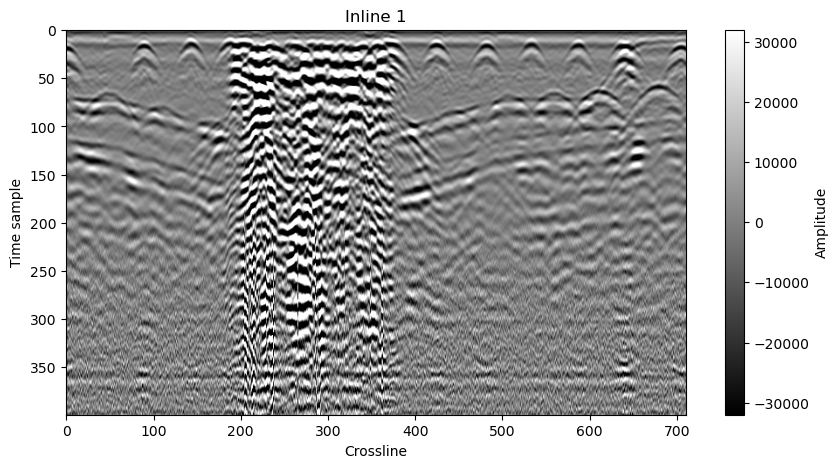

In [58]:
#Plot for file 1
#we take the first inline
import numpy as np
import matplotlib.pyplot as plt

def plot_inline(df, inlinenr):
    
    
    sub = df[df["inline"] == inlinenr].sort_values("crossline")
    traces = np.vstack(sub["Amplitude"].values)
    img = traces.T

    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="grey", aspect="auto", origin="upper")
    plt.title(f"Inline {inlinenr}")
    plt.xlabel("Crossline")
    plt.ylabel("Time sample")
    plt.colorbar(label="Amplitude")
    plt.show()


plot_inline(df1, 1)

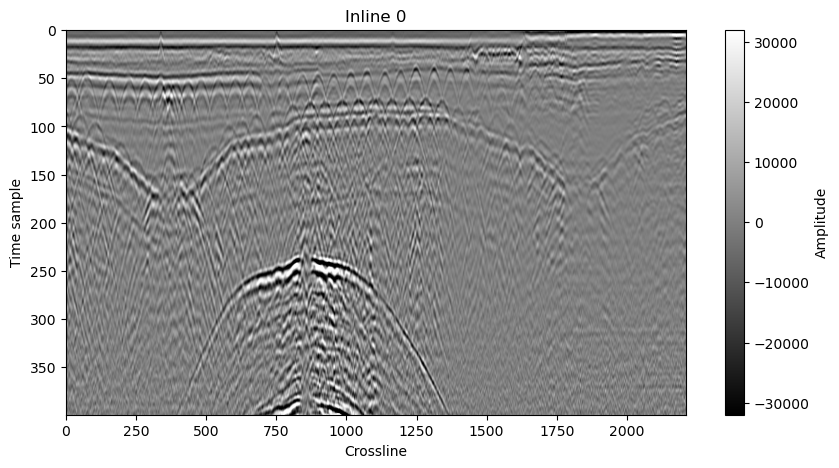

In [ ]:
#Plot for file 2
#we take the first inline
import numpy as np
import matplotlib.pyplot as plt

def plot_inline(df, inlinenr):
    
    
    sub = df[df["inline"] == inlinenr].sort_values("crossline")
    traces = np.vstack(sub["Amplitude"].values)
    img = traces.T

    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="grey", aspect="auto", origin="upper")
    plt.title(f"Inline {inlinenr}")
    plt.xlabel("Crossline")
    plt.ylabel("Time sample")
    plt.colorbar(label="Amplitude")
    plt.show()


plot_inline(df2, 0)

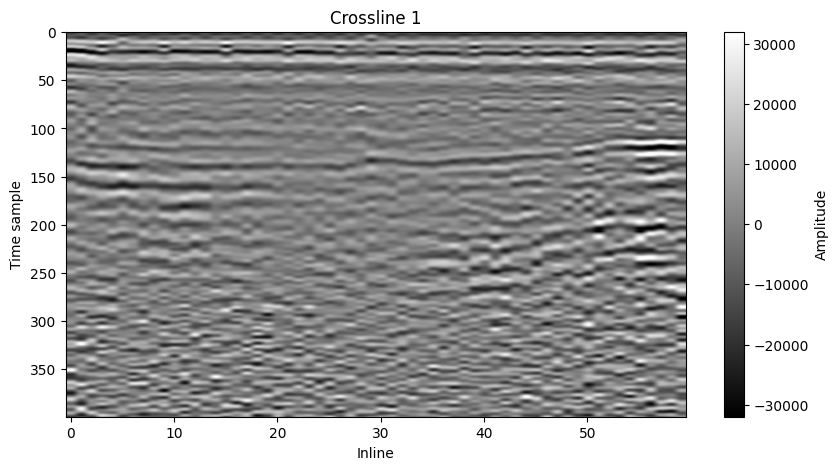

In [24]:
#plot for file 1
# we take the first crossline
def plot_crossline(df, cross_nr):
    sub = df[df["crossline"] == cross_nr].sort_values("inline")
    traces = np.vstack(sub["Amplitude"].values)
    img = traces.T

    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="gray", aspect="auto", origin="upper")
    plt.title(f"Crossline {cross_nr}")
    plt.xlabel("Inline")
    plt.ylabel("Time sample")
    plt.colorbar(label="Amplitude")
    plt.show()

plot_crossline(df1, 1)

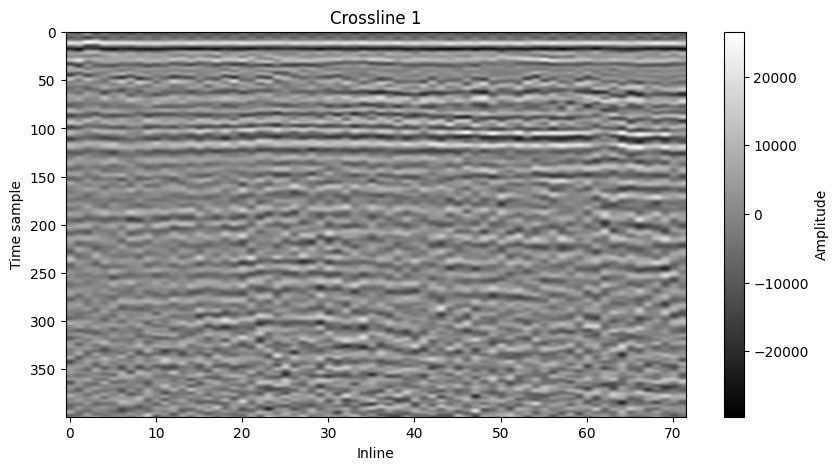

In [22]:
#plot for file 2
# we take the first crossline
def plot_crossline(df, cross_nr):
    sub = df[df["crossline"] == cross_nr].sort_values("inline")
    traces = np.vstack(sub["Amplitude"].values)
    img = traces.T

    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="gray", aspect="auto", origin="upper")
    plt.title(f"Crossline {cross_nr}")
    plt.xlabel("Inline")
    plt.ylabel("Time sample")
    plt.colorbar(label="Amplitude")
    plt.show()

plot_crossline(df2, 1)

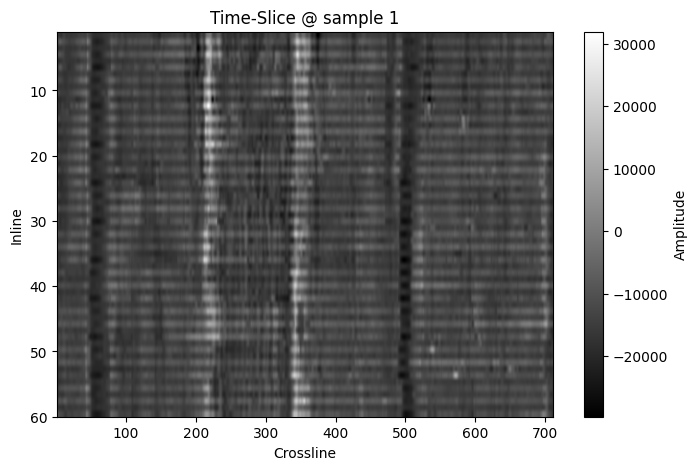

In [25]:
#plot for file 1
#plotting time slice (Biird view)
def plot_timeslice(df, sample_index):
    inlines = np.sort(df["inline"].unique())
    crosslines = np.sort(df["crossline"].unique())
    mat = np.full((len(inlines), len(crosslines)), np.nan)

    il_map = {v:i for i,v in enumerate(inlines)}
    cl_map = {v:i for i,v in enumerate(crosslines)}

    for _, row in df.iterrows():
        i = il_map[row["inline"]]
        j = cl_map[row["crossline"]]
        mat[i, j] = row["Amplitude"][sample_index]

    plt.figure(figsize=(8,5))
    plt.imshow(np.nan_to_num(mat), cmap="gray", aspect="auto",
               extent=[crosslines.min(), crosslines.max(), inlines.max(), inlines.min()])
    plt.title(f"Time-Slice @ sample {sample_index}")
    plt.xlabel("Crossline")
    plt.ylabel("Inline")
    plt.colorbar(label="Amplitude")
    plt.show()

plot_timeslice(df1, 1)

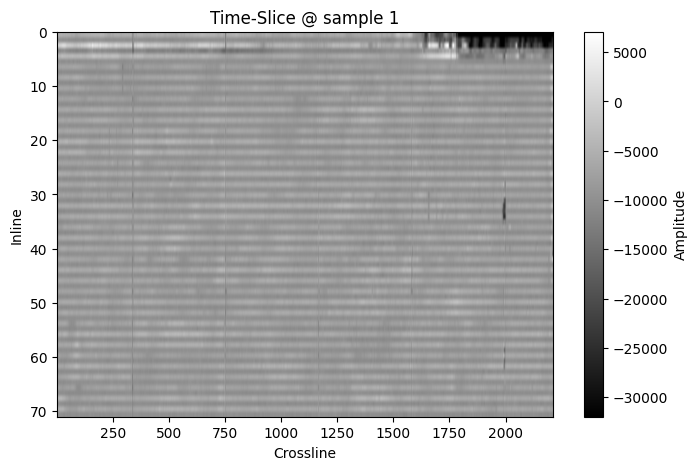

In [26]:
#plot for file 2
#plotting time slice (Biird view)
def plot_timeslice(df, sample_index):
    inlines = np.sort(df["inline"].unique())
    crosslines = np.sort(df["crossline"].unique())
    mat = np.full((len(inlines), len(crosslines)), np.nan)

    il_map = {v:i for i,v in enumerate(inlines)}
    cl_map = {v:i for i,v in enumerate(crosslines)}

    for _, row in df.iterrows():
        i = il_map[row["inline"]]
        j = cl_map[row["crossline"]]
        mat[i, j] = row["Amplitude"][sample_index]

    plt.figure(figsize=(8,5))
    plt.imshow(np.nan_to_num(mat), cmap="gray", aspect="auto",
               extent=[crosslines.min(), crosslines.max(), inlines.max(), inlines.min()])
    plt.title(f"Time-Slice @ sample {sample_index}")
    plt.xlabel("Crossline")
    plt.ylabel("Inline")
    plt.colorbar(label="Amplitude")
    plt.show()

plot_timeslice(df2, 1)

## Chapter 5: Implementing in Pipeline

Out of this knowledge of the above chapters the following class **DatatoolKit** is implemented into the **Pipeline Package**. \
the class includes the methods:
- Data Loading with segyio as **LoadSGY(self)** from Chapter 1
- creating the Dataframe as **create_df(self, f, create_csv =False):** from Chapter 2
- plotting the Grid as **plot_grid(self, df)** from Chapter 2
- plotting the radargramms from Chapter 4
    - inline radargramm as **plot_inline_cut_raw(self, df, inlinenr)**
    - crossline radargramm as **plot_crossline_cut_raw(self, df, cross_nr)**
    - time slice radargramm as **plot_timeslice_cut_raw(self, df, sample_index)**
- Analyzing Datatype as **analyse_datetype(self, df, create_pivot = False)**